In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
telcom = pd.read_csv(r"Teleco_Costumer_Churn.csv")

In [3]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
telcom.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 21 entries, customerID to Churn
dtypes: float64(1), int64(2), object(18)
memory usage: 1.1+ MB


In [6]:
print("\n Valores unicos: ", telcom.nunique())


 Valores unicos:  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
list(telcom.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Se cuenta con 7043 registros, de cada uno de estos registros se cuenta con: CostumerID, gender, SeniorCitizen, Partner, Dependents, tenure (tenencia), PhoneService, MultiplesLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBillng, PaymentMethod, MonthlyCharges, TotalCharges, Churn. 

Variables asociadas a la identificación del cliente:
1. CostumerID
2. Gender (Whether the customer is a male or a female)
3. SeniorCitizen (Whether the customer is a senior citizen or not (1, 0))
4. Partner (Whether the customer has a partner or not (Yes, No))
5. Dependents (Whether the customer has dependents or not (Yes, No))


Variables asociadas a servicios que tiene el cliente:
1. PhoneService (Whether the customer has a phone service or not (Yes, No))
2. MultiplesLines (Whether the customer has multiple lines or not (Yes, No, No phone service))
3. InternetService (Customer’s internet service provider (DSL, Fiber optic, No))
4. OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service))
5. OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service))
6. DeviceProtecion (DeviceProtectionWhether the customer has device protection or not (Yes, No, No internet service))
7. TechSupport (Whether the customer has tech support or not (Yes, No, No internet service))
8. StreamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service))
9. StreamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service))

Variables asocidas al contrato/método de pago:
1. Contract (The contract term of the customer (Month-to-month, One year, Two year))
2. PaperlessBilling (Whether the customer has paperless billing or not (Yes, No))
3. PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)))
4. MothlyCharges (The amount charged to the customer monthly)
5. TotalCharges (The total amount charged to the customer)
7. Ternure (Number of months the customer has stayed with the company)
8. Churn (Whether the customer churned or not (Yes or No))



Hay algunas variables que tienen variables categoricas donde algunas de las categorias tienen el mismo significado en términos prácticos, como por ejemplo en MultiplesLines que tiene "No" y "No phone Service" lo que es lo mismo ya que un cliente sin servicio telefonico tampoco puede tener multiples líneas. Entonces, en estas variables se cambiará 'No phone Service" por "No", y análogo en los demás.







# 2. Data Manipulation

In [8]:
# DATA MANIPULATION

telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

In [9]:
print('Total de valores nulos en TotalCharges: ', telcom["TotalCharges"].isna().sum())

Total de valores nulos en TotalCharges:  11


Dado que son pocos valores nulos, solo son amputados de la base de datos.

In [10]:
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

In [11]:
#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [12]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport','StreamingTV', 'StreamingMovies']
for c_name in replace_cols:
    telcom[c_name] = telcom[c_name].replace({'No internet service' : 'No'})


In [13]:
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"
})

In [14]:
# variable ternure esta en mesese, se pasa a una variable categorica y se crea una nueva variable llamada ternure_group

def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return 'Tenure_0-12'
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"


telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
axis = 1)

In [15]:
# separar entre fuga y no fuga
churn = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col = ['customerID']
target_col = ["Churn"]
cat_cols = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col+ Id_col]

## 3. Exploratory data analysis

A continuación se presentan tablas asociadas a la identificación del cliente:

In [22]:
def plot_pie_graph(c_name):
    labels = churn[c_name].value_counts().keys().to_list()
    c_churn = churn[c_name].value_counts().values #[female, male]
    c_no_churn = not_churn[c_name].value_counts().values #[female, male]
    # only "explode" the 2nd slice (i.e. 'Hogs') 
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].pie(c_churn, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax[0].axis('equal')
    ax[0].title.set_text('Churn')

    ax[1].pie(c_no_churn, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax[1].axis('equal')  
    ax[1].title.set_text('No Churn')

    plt.tight_layout()
    #plt.title('Gender')
    plt.show()
    

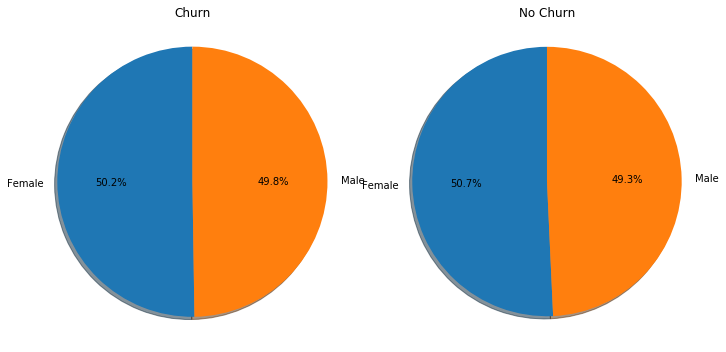

In [23]:
plot_pie_graph('gender')

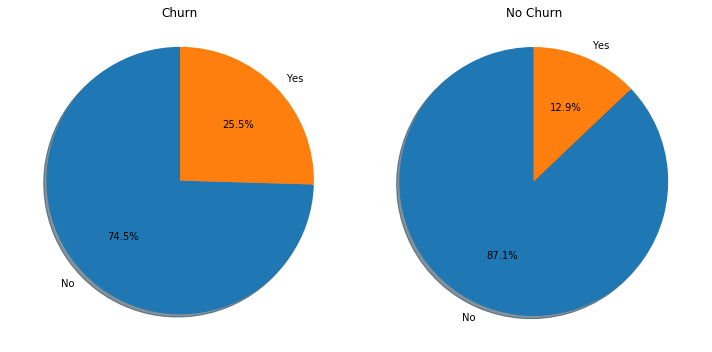

In [24]:
plot_pie_graph('SeniorCitizen')

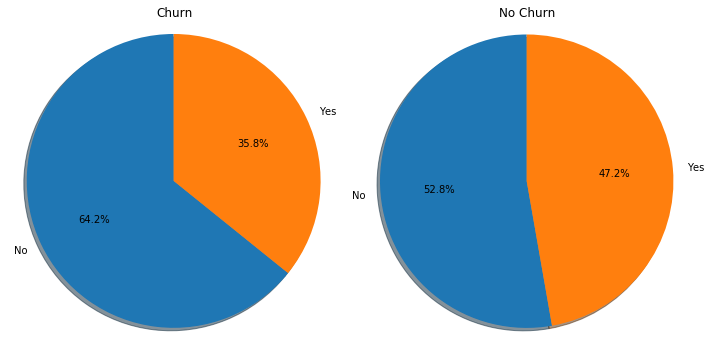

In [25]:
plot_pie_graph('Partner')

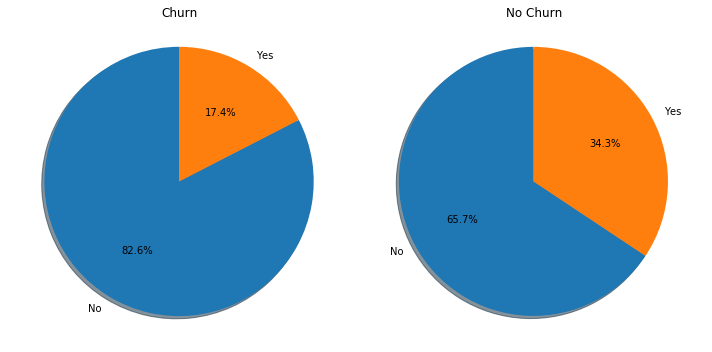

In [26]:
plot_pie_graph('Dependents')

1. Gender: Genero no esta asociado a la fuga o no fuga.
2. Senior Citizen: Los clientes en fuga son en su mayoria No Senior Citizen y los que no se fugan son en su mayoria No Senior Citizen. Esta variable no nos indinca mucho del comportamiento del cliente.
3. Partners: No entrega información relevante.
4. Dependents: La amplia mayoría de los clientes que se FUGAN, no tienen dependientes. 



Variables asociadas a los servicios prestados por la compañia. 

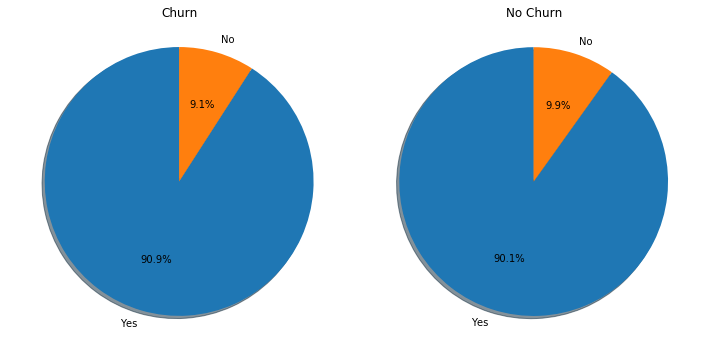

In [28]:
plot_pie_graph('PhoneService')

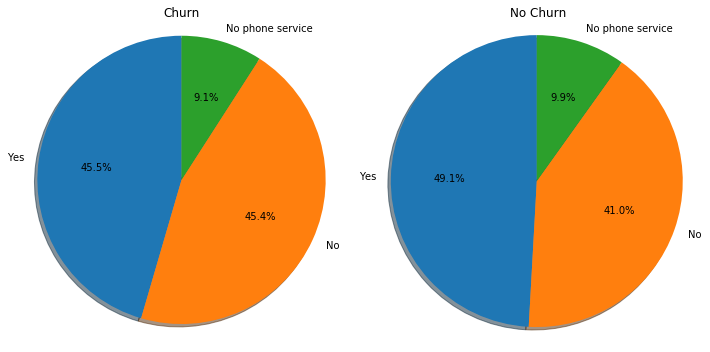

In [38]:
 plot_pie_graph('MultipleLines')

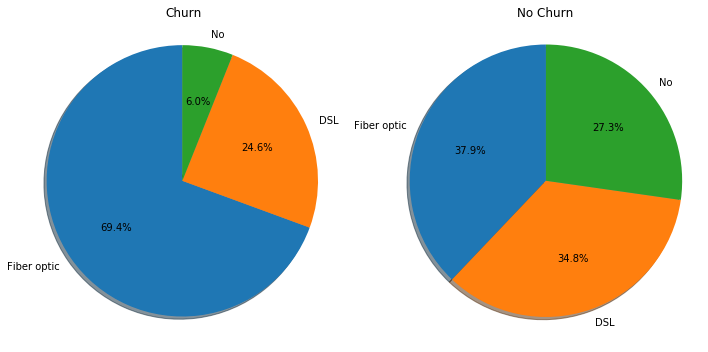

In [29]:
plot_pie_graph('InternetService')

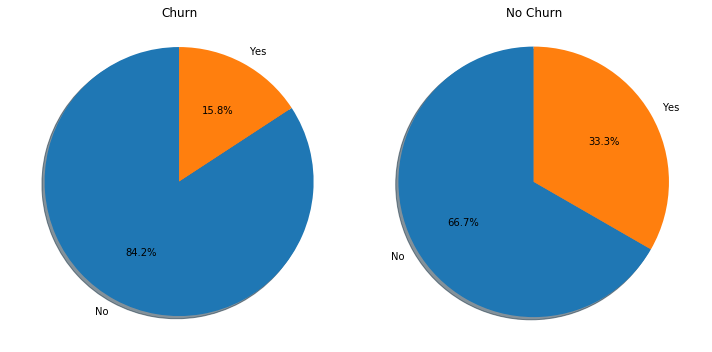

In [30]:
plot_pie_graph('OnlineSecurity')

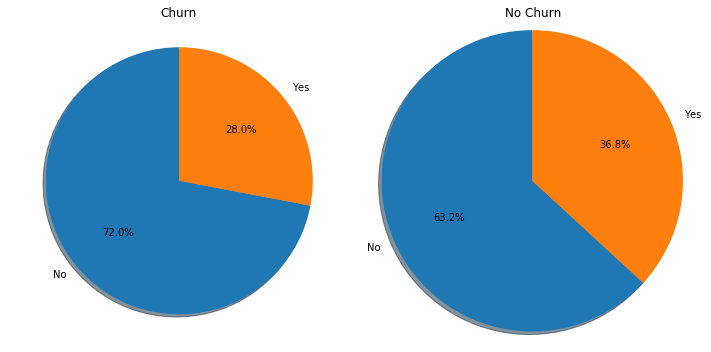

In [31]:
plot_pie_graph('OnlineBackup')

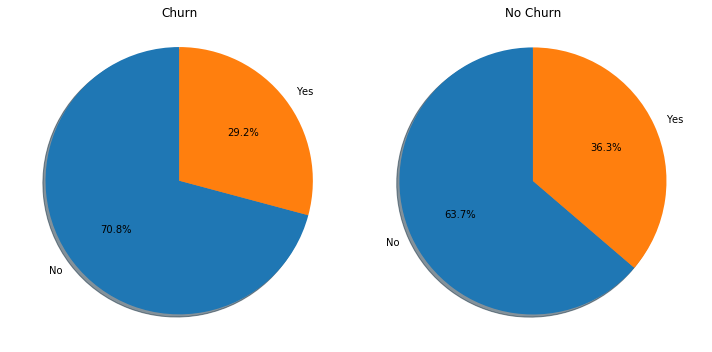

In [32]:
plot_pie_graph('DeviceProtection')

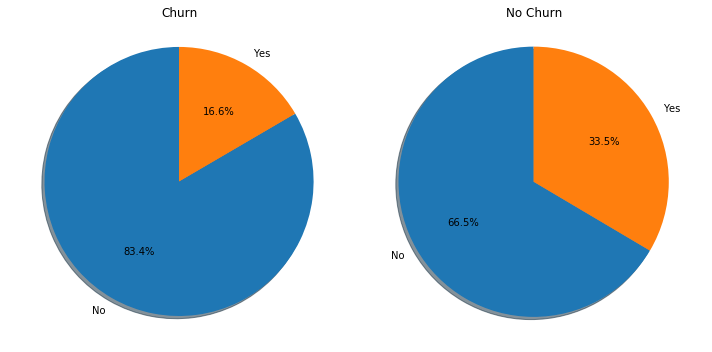

In [33]:
plot_pie_graph('TechSupport')

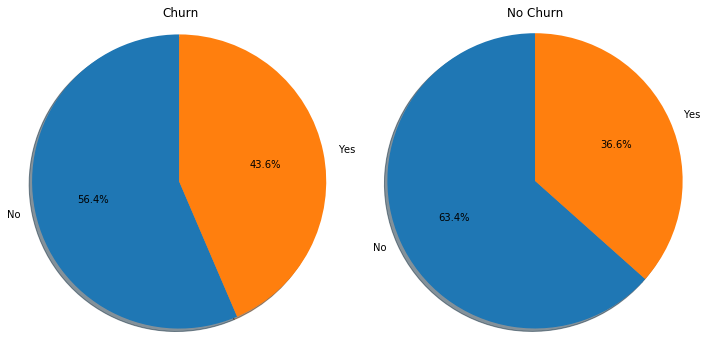

In [34]:
plot_pie_graph('StreamingTV')

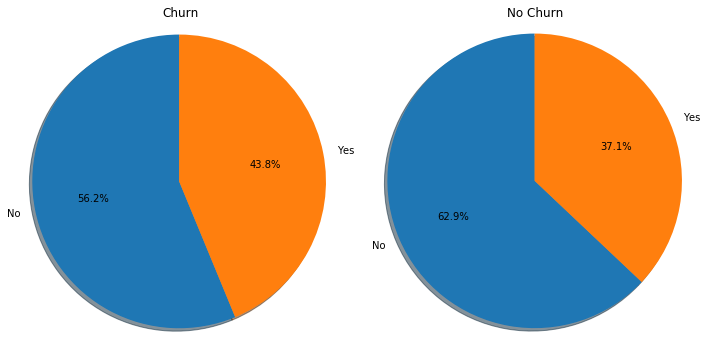

In [35]:
plot_pie_graph('StreamingMovies')

1. PhoneService: No entrega información relevante (no permite diferenciar entre los que se fugan o los qe no se fugan).
2. MultiplesLines: No entrega información relevante.
3. InternetService: La mayoría de los cliente que se fuga tienen fibra optica. Entonces, la fibra optica es un potencial problema.
4. OnlineSecurity: Hay amplio porcentaje de los cliente que se fugan que no hay contratado OnlineSecurity. Por lo que un cliente no acepte puede signifiar que pretende retirarse. 
5. OnlineBackup: No entrega información relevante.
6. DeviceProtecion: No entrega información relevante.
7. TechSupport: Hay una amplia mayoría de cliente que se fugan que no ha solicitado soporte técnico. 
8. StreamingTV: No entrega información relevante.
9. StreamingMovies: No entrega información relevante. 

Variables asociadas al tipo de contrato

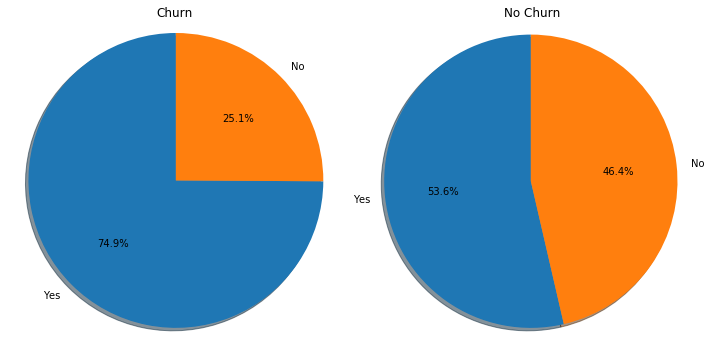

In [40]:
plot_pie_graph('PaperlessBilling')

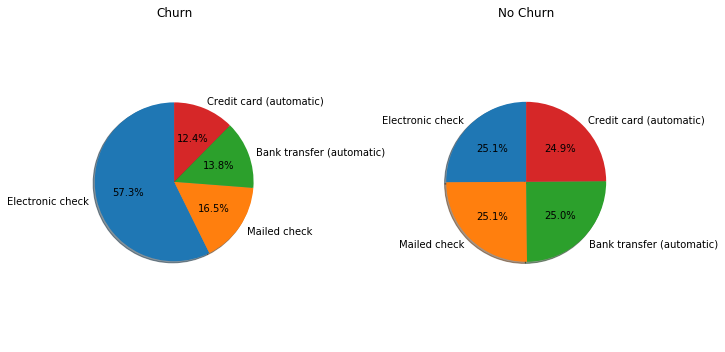

In [41]:
plot_pie_graph('PaymentMethod')

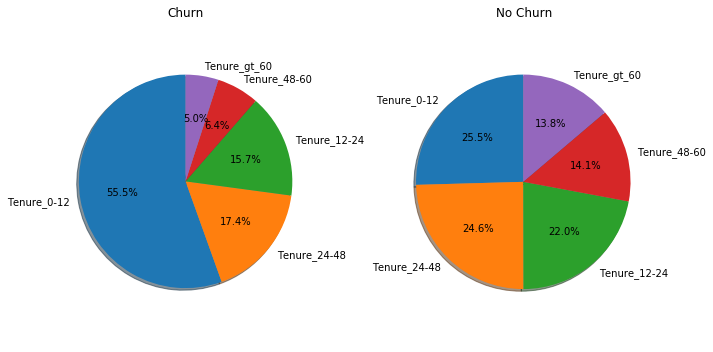

In [43]:
plot_pie_graph('tenure_group')

1. PaperlessBilling: Hay relación entre fugarse y no recibir la cuenta.
2. PaymentMethod: La mayoria de los que se fugan pagan con cheque electronico 
3. tenure_group: Los clientes que más se fugan son los que llevan menos de 1 año.
